In [1]:
import pandas as pd
from prophet import Prophet
import os
import openpyxl
os.getcwd()

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'd:\\Rprojects\\myprojects\\nezam\\bahar\\data'

In [2]:
# pip install prophet 

df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()



,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      2905 non-null   object 
 1   y       2905 non-null   float64
dtypes: float64(1), object(1)
memory usage: 45.5+ KB


(2905, 2)

In [84]:
os.chdir('D:/Rprojects/myprojects/marsho/new_analytics')
df2 = pd.read_excel('tidydata_with_NA2.xlsx')

In [85]:
os.getcwd()

'D:\\Rprojects\\myprojects\\marsho\\new_analytics'

In [86]:
df['cap']=8.5

In [87]:
m = Prophet(growth ='logistic')
m.fit(df)

15:19:00 - cmdstanpy - INFO - Chain [1] start processing
15:19:02 - cmdstanpy - INFO - Chain [1] done processing


In [88]:
future = m.make_future_dataframe(periods = 365)
# future['cap']=8.5
# fcst = m.predict(future)
# fig = m.plot(fcst)

In [89]:
# df['y'] = 10 - df['y']
# df['cap'] = 6
# df['floor'] = 1.5
# future['cap'] = 6
# future['floor'] = 1.5
# m = Prophet(growth='logistic')
# m.fit(df)
# fcst = m.predict(future)
# fig = m.plot(fcst)

## Holidays


In [90]:
fitr = pd.DataFrame({
  'holiday' :'fitr',
  'ds' : pd.to_datetime(['2020-06-04', '2020-06-05', '2021-05-13', 
                         '2021-05-14','2022-05-03','2022-05-04',
                       '2023-04-22','2023-04-23']),
  'lower_window' : 0,
  'upper_window' : 1
})

ashoora = pd.DataFrame({
  'holiday' :'ashoora',
  'ds' : pd.to_datetime(['2020-09-07', '2020-09-08','2021-08-18',
                         '2021-08-19','2022-08-07','2022-08-08',
                         '2023-07-27','2023-07-28']),
  'lower_window' : 0,
  'upper_window' : 1
})

nowrouz = pd.DataFrame({
  'holiday' :'nowrouz',
  'ds' : pd.to_datetime(['2020-03-20','2020-03-21','2020-03-22',
                          '2020-03-23','2020-03-24','2020-03-25',
                         '2020-03-26','2020-03-27','2020-03-28',
                         '2021-03-21','2021-03-22','2021-03-23',
                         '2021-03-24','2021-03-25','2021-03-26',
                         '2021-03-27','2021-03-28','2021-03-29',
                         '2022-03-21','2022-03-22','2022-03-23',
                         '2022-03-24','2022-03-25','2022-03-26',
                         '2022-03-27','2022-03-28','2022-03-29',
                         '2023-03-21','2023-03-22','2023-03-23',
                         '2023-03-24','2023-03-25','2023-03-26',
                        '2023-03-27','2023-03-28','2023-03-29']),
  'lower_window' : 0,
  'upper_window' : 1
})

long_weekend = pd.DataFrame({
  'holiday' :'long_weekend',
  'ds' : pd.to_datetime(['2021-06-04','2021-06-05','2021-06-06','2021-07-29','2021-07-30','2021-10-22' , '2021-10-23','2021-10-24','2022-03-18','2022-03-19','2022-03-20','2022-06-03','2022-06-03','2022-06-05'
                          ,'2023-06-04' ,
                            '2023-06-05','2023-09-06' ,'2023-09-07','2023-09-08','2023-09-14', '2023-09-15','2023-09-16',
                            '2023-09-22','2023-09-23','2023-09-24']),
  'lower_window' : 0,
  'upper_window' : 1
})



In [91]:
holidays = pd.concat((fitr , ashoora , nowrouz , long_weekend))

In [92]:
holidays.tail(6)

,holiday,ds,lower_window,upper_window
19,long_weekend,2023-09-14,0,1
20,long_weekend,2023-09-15,0,1
21,long_weekend,2023-09-16,0,1
22,long_weekend,2023-09-22,0,1
23,long_weekend,2023-09-23,0,1
24,long_weekend,2023-09-24,0,1


In [93]:
df2 = df2.rename(columns={'date':'ds', 'joje_plate':'y'})


In [94]:
df2 = df2[['ds','y']]

In [95]:
df2

,ds,y
0,2020-03-20,14.0
1,2020-03-21,23.0
2,2020-03-22,39.0
3,2020-03-23,22.0
4,2020-03-24,16.0
...,...,...
1225,NaT,NaN
1226,NaT,NaN
1227,NaT,NaN
1228,NaT,NaN


In [96]:

# Assuming your DataFrame is named df
# Calculate the index to split the DataFrame
split_index = int(0.8 * len(df2))

# Split the DataFrame
df_sampled = df2.iloc[:split_index, :]
df_remaining = df2.iloc[split_index:, :]

In [97]:
m = Prophet(holidays=holidays)
forecast = m.fit(df_sampled).predict(future)

15:19:03 - cmdstanpy - INFO - Chain [1] start processing


15:19:03 - cmdstanpy - INFO - Chain [1] done processing


In [98]:
forecast[(forecast['ashoora'] + forecast['nowrouz'] + forecast['fitr']+forecast['long_weekend']).abs()>0][
    ['ds','ashoora','nowrouz','fitr','long_weekend']][-10:]

,ds,ashoora,nowrouz,fitr,long_weekend


In [99]:
set(holidays['holiday'])
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,ashoora,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,-10.274908,-19.059083,0.453621,-10.274908,-10.274908,1.041484,1.041484,1.041484,0.0,...,-0.409322,-0.409322,-0.409322,1.450806,1.450806,1.450806,0.0,0.0,0.0,-9.233425
1,2007-12-11,-10.268997,-18.930882,0.857706,-10.268997,-10.268997,0.916265,0.916265,0.916265,0.0,...,-0.602323,-0.602323,-0.602323,1.518587,1.518587,1.518587,0.0,0.0,0.0,-9.352733
2,2007-12-12,-10.263086,-18.966258,-0.322456,-10.263086,-10.263086,1.064660,1.064660,1.064660,0.0,...,-0.520731,-0.520731,-0.520731,1.585390,1.585390,1.585390,0.0,0.0,0.0,-9.198426
3,2007-12-13,-10.257175,-14.866443,3.829722,-10.257175,-10.257175,4.762137,4.762137,4.762137,0.0,...,3.112100,3.112100,3.112100,1.650037,1.650037,1.650037,0.0,0.0,0.0,-5.495038
4,2007-12-14,-10.251264,-16.594122,2.574138,-10.251264,-10.251264,3.542904,3.542904,3.542904,0.0,...,1.831653,1.831653,1.831653,1.711251,1.711251,1.711251,0.0,0.0,0.0,-6.708360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,2017-01-15,9.373484,-0.558901,18.113377,9.373484,9.373484,-1.338284,-1.338284,-1.338284,0.0,...,-2.460792,-2.460792,-2.460792,1.122508,1.122508,1.122508,0.0,0.0,0.0,8.035200
3266,2017-01-16,9.379395,1.801855,20.766207,9.379395,9.379395,0.819766,0.819766,0.819766,0.0,...,-0.409322,-0.409322,-0.409322,1.229089,1.229089,1.229089,0.0,0.0,0.0,10.199162
3267,2017-01-17,9.385306,0.274847,19.353595,9.385306,9.385306,0.740266,0.740266,0.740266,0.0,...,-0.602323,-0.602323,-0.602323,1.342589,1.342589,1.342589,0.0,0.0,0.0,10.125573
3268,2017-01-18,9.391217,-0.168771,19.460393,9.391217,9.391217,0.938740,0.938740,0.938740,0.0,...,-0.520731,-0.520731,-0.520731,1.459471,1.459471,1.459471,0.0,0.0,0.0,10.329958


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on t

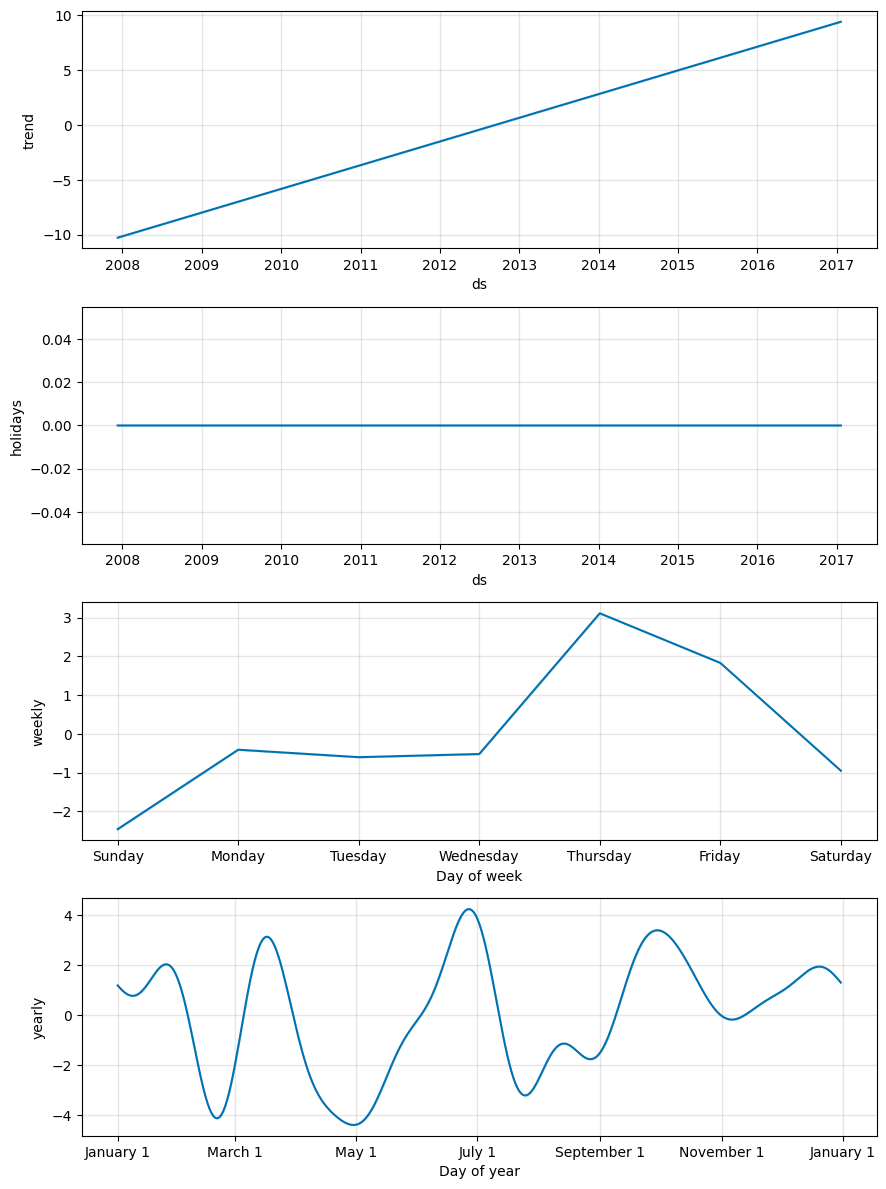

In [100]:
fig = m.plot_components(forecast)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



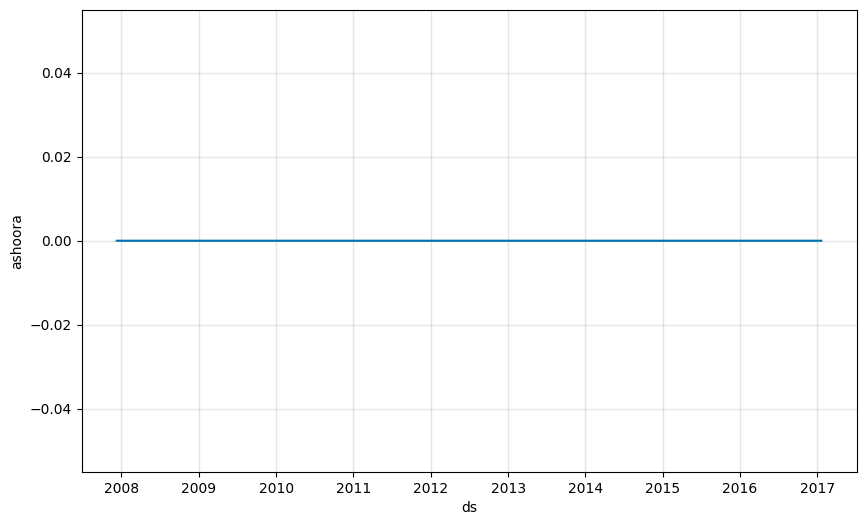

In [101]:
from prophet.plot import plot_forecast_component
fig = plot_forecast_component(m, forecast, 'ashoora')

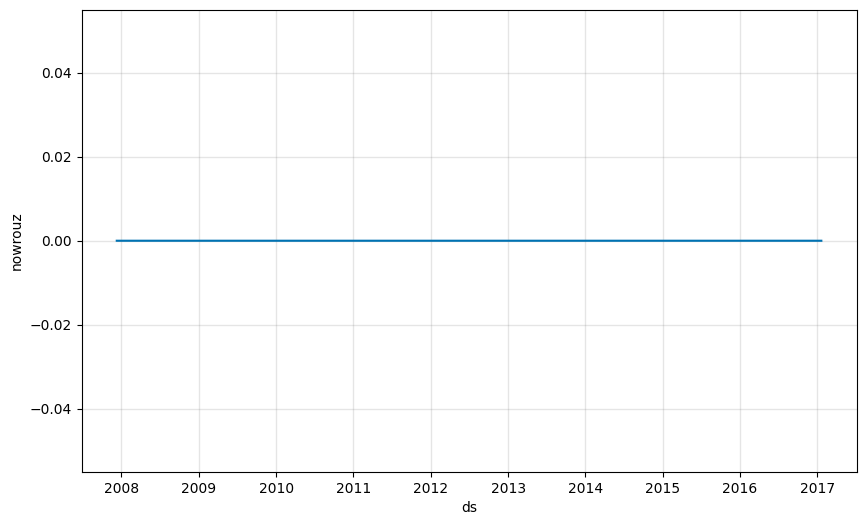

In [102]:
fig = plot_forecast_component(m, forecast, 'nowrouz')

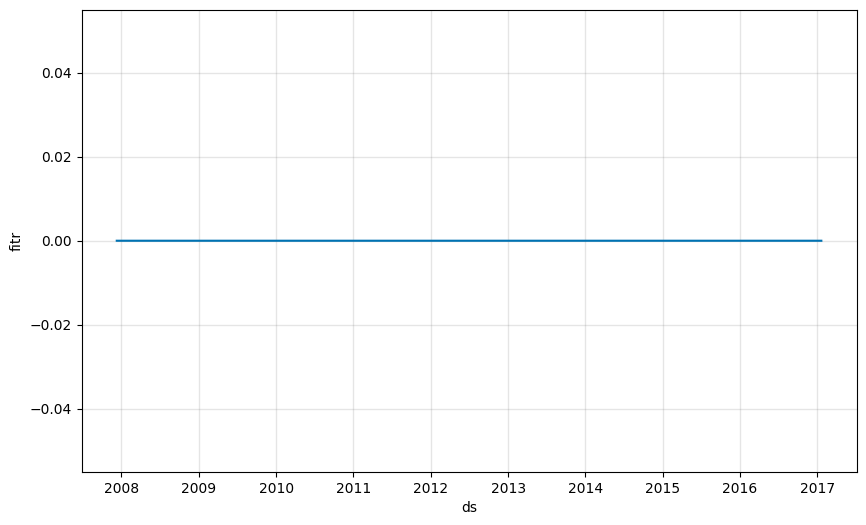

In [103]:
fig = plot_forecast_component(m, forecast, 'fitr')

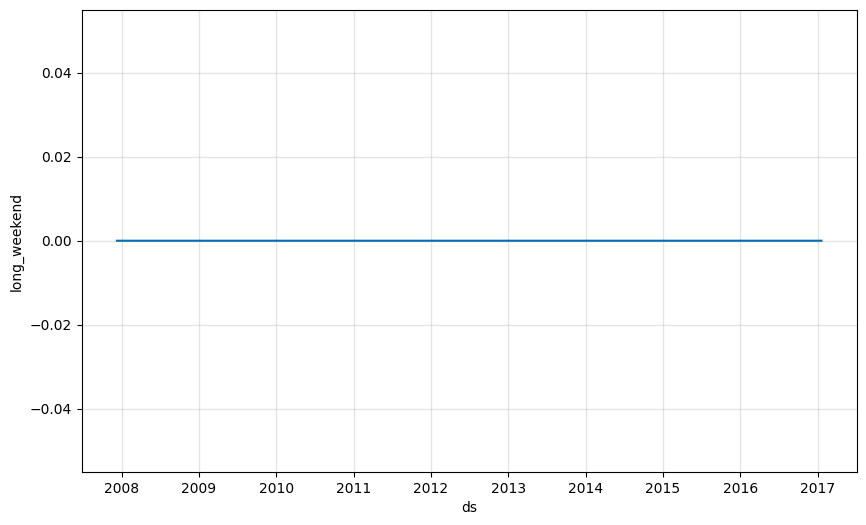

In [104]:
fig = plot_forecast_component(m, forecast, 'long_weekend')

In [105]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,ashoora,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,-10.274908,-19.059083,0.453621,-10.274908,-10.274908,1.041484,1.041484,1.041484,0.0,...,-0.409322,-0.409322,-0.409322,1.450806,1.450806,1.450806,0.0,0.0,0.0,-9.233425
1,2007-12-11,-10.268997,-18.930882,0.857706,-10.268997,-10.268997,0.916265,0.916265,0.916265,0.0,...,-0.602323,-0.602323,-0.602323,1.518587,1.518587,1.518587,0.0,0.0,0.0,-9.352733
2,2007-12-12,-10.263086,-18.966258,-0.322456,-10.263086,-10.263086,1.064660,1.064660,1.064660,0.0,...,-0.520731,-0.520731,-0.520731,1.585390,1.585390,1.585390,0.0,0.0,0.0,-9.198426
3,2007-12-13,-10.257175,-14.866443,3.829722,-10.257175,-10.257175,4.762137,4.762137,4.762137,0.0,...,3.112100,3.112100,3.112100,1.650037,1.650037,1.650037,0.0,0.0,0.0,-5.495038
4,2007-12-14,-10.251264,-16.594122,2.574138,-10.251264,-10.251264,3.542904,3.542904,3.542904,0.0,...,1.831653,1.831653,1.831653,1.711251,1.711251,1.711251,0.0,0.0,0.0,-6.708360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,2017-01-15,9.373484,-0.558901,18.113377,9.373484,9.373484,-1.338284,-1.338284,-1.338284,0.0,...,-2.460792,-2.460792,-2.460792,1.122508,1.122508,1.122508,0.0,0.0,0.0,8.035200
3266,2017-01-16,9.379395,1.801855,20.766207,9.379395,9.379395,0.819766,0.819766,0.819766,0.0,...,-0.409322,-0.409322,-0.409322,1.229089,1.229089,1.229089,0.0,0.0,0.0,10.199162
3267,2017-01-17,9.385306,0.274847,19.353595,9.385306,9.385306,0.740266,0.740266,0.740266,0.0,...,-0.602323,-0.602323,-0.602323,1.342589,1.342589,1.342589,0.0,0.0,0.0,10.125573
3268,2017-01-18,9.391217,-0.168771,19.460393,9.391217,9.391217,0.938740,0.938740,0.938740,0.0,...,-0.520731,-0.520731,-0.520731,1.459471,1.459471,1.459471,0.0,0.0,0.0,10.329958


In [106]:
df_filtered = forecast[(forecast['ds'] >= '2022-08-12') & (forecast['ds'] <= '2023-08-12')]


In [107]:
df_filtered

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,ashoora,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat


In [108]:
excel_file_path = 'D:\\Rprojects\\myprojects\\marsho\\new_analytics\\file.xlsx'

# Write the DataFrame to an Excel file
df_filtered.to_excel(excel_file_path, index=False)

In [109]:
excel_file_path

'D:\\Rprojects\\myprojects\\marsho\\new_analytics\\file.xlsx'